In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import time

In [69]:
X_train = pd.read_csv('../2_INPUT_DATA/3_SPLIT/X_train.csv')
Y_train = pd.read_csv('../2_INPUT_DATA/3_SPLIT/Y_train.csv')
X_test = pd.read_csv('../2_INPUT_DATA/3_SPLIT/X_test.csv')
Y_test = pd.read_csv('../2_INPUT_DATA/3_SPLIT/Y_test.csv')
ids_test = pd.read_csv('../2_INPUT_DATA/3_SPLIT/ids_test.csv')
feature_names = pd.read_csv('../2_INPUT_DATA/2_FEATURE_PROCESSED/feature_names.csv')

In [70]:
X_train.columns = feature_names['0'].tolist()

In [45]:
def plot_histogram(data, category):

    # Highlighted data point
    highlighted_index = 0  # Index of the data point to highlight
    highlighted_value = data.loc[highlighted_index, category]

    # Plotting
    fig, ax = plt.subplots()
    hist = sns.histplot(data=data, x=category, hue='TARGET', kde=True, bins=48, multiple='stack', ax=ax) #stat='density',
    # Get the counts for each bin
    hight_P = hight_of_selected_point(hist, data, highlighted_index)

    # Highlight one specific data point
    if Y_train.loc[highlighted_index, 'TARGET'] == 1:
        ax.scatter(highlighted_value, hight_P, color='red', label='Highlighted Point', zorder=5)
    elif Y_train.loc[highlighted_index, 'TARGET'] == 0:
        ax.scatter(highlighted_value, hight_P, color='blue', label='Highlighted Point', zorder=5)

    # Customize plot
    ax.set_xlabel(category)
    ax.set_ylabel('Number of Customers')
    ax.set_title('Stacked Distribution of Customer Age with Highlighted Point')
    legend = ax.get_legend()
    handles = legend.legend_handles
    legend.remove()
    ax.legend(handles, ['0 pays', '1 will have difficulty'], title='Client group')

    plt.show(fig)

In [46]:
def hight_of_selected_point(hist, data, highlighted_index):
    bin_counts = [rect.get_height() for rect in hist.patches]
    print(len(bin_counts))
    print(len(bin_counts)/2)
    print(min(data['DAYS_BIRTH']), " ", max(data['DAYS_BIRTH']))
    print("selected point: ", data.loc[highlighted_index, 'DAYS_BIRTH'])
    scaled_point = int(round(data.loc[highlighted_index, 'DAYS_BIRTH']-min(data['DAYS_BIRTH'])))
    print("scaled point: ", scaled_point)

    steps = (max(data['DAYS_BIRTH'])-min(data['DAYS_BIRTH']))/(len(bin_counts)/2)
    print("steps :", steps )
    
    if data.loc[highlighted_index, 'TARGET'] == 0:
        bucket = int(round(scaled_point / steps,0))
 
    elif data.loc[highlighted_index, 'TARGET'] == 1:
        bucket = int(round(scaled_point / steps,0)+(len(bin_counts)/2))
        
    print("bucket :", bucket)
    hight = bin_counts[bucket]/2
    print("hight :", hight)
    
    return hight

In [5]:
#Y_train

In [6]:
# ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'OWN_CAR_AGE', 'AMT_CREDIT']

## Preparing DAYS_BIRTH

In [121]:
#Merge X_train and Y_train into a single DataFrame
data = pd.concat([X_train['DAYS_BIRTH']/365, Y_train], axis=1)
category = 'DAYS_BIRTH'

data_0 = data[data['TARGET']==0]
data_1 = data[data['TARGET']==1]


In [120]:

print(min(data['DAYS_BIRTH']), " ", max(data['DAYS_BIRTH']))
min_age = int(round(min(data['DAYS_BIRTH']),0))
max_age = int(round(max(data['DAYS_BIRTH']),0))
print(min_age, " ", max_age)
num_bin = max_age - min_age
print(num_bin)
range_age = range(min_age, max_age, 1)
len(range_age)

20.517808219178082   69.04383561643836
21   69
48


48

In [123]:
#plot_histogram(data, category)

48


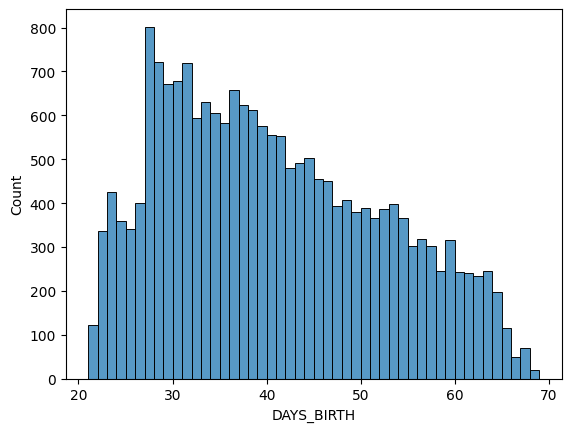

In [122]:
fig, ax = plt.subplots()
hist = sns.histplot(data=data_1['DAYS_BIRTH'],  bins=48,  ax=ax)
bar_height_1 = [h.get_height() for h in hist.patches]
print(len(bar_height_1))
#plt.show(fig)
#pyplot.bar(range_age, bar_height_1)

48


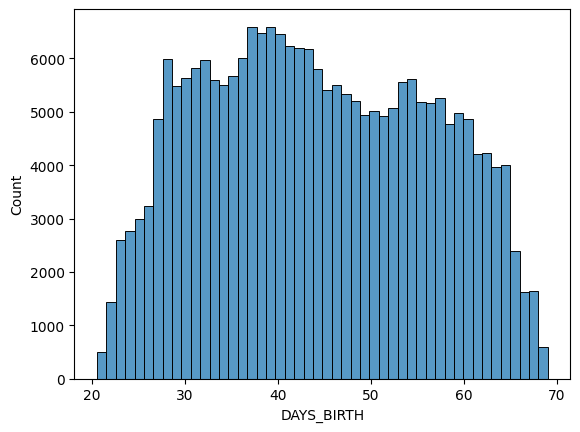

In [115]:
fig, ax = plt.subplots()
hist = sns.histplot(data=data_0['DAYS_BIRTH'],  bins=48,  ax=ax)
bar_height_0 = [h.get_height() for h in hist.patches]
print(len(bar_height_0))
#plt.show(fig)
#pyplot.bar(range_age, bar_height_0)
#pyplot.bar(range_age, bar_height_1, color='b')

In [130]:
age_ratio =  [x/(x + y) for x, y in zip(bar_height_1, bar_height_0)]
# Create a dictionary with column names as keys and lists as values
data = {
    'Age': range_age, 
    'TARGET0': bar_height_0,
    'TARGET1': bar_height_1,
    'AGE1ratio': age_ratio
}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)
df.to_csv('data/1_age.csv', index = False)
# Display the DataFrame
print(df)

    Age  TARGET0  TARGET1  AGE1ratio
0    21      497      122   0.197092
1    22     1444      336   0.188764
2    23     2597      426   0.140920
3    24     2770      359   0.114733
4    25     2995      341   0.102218
5    26     3233      401   0.110347
6    27     4870      802   0.141396
7    28     5983      722   0.107681
8    29     5490      672   0.109056
9    30     5627      679   0.107675
10   31     5818      719   0.109989
11   32     5975      595   0.090563
12   33     5595      631   0.101349
13   34     5499      606   0.099263
14   35     5677      582   0.092986
15   36     5998      658   0.098858
16   37     6593      624   0.086463
17   38     6479      612   0.086307
18   39     6586      576   0.080424
19   40     6463      555   0.079082
20   41     6229      552   0.081404
21   42     6203      481   0.071963
22   43     6182      491   0.073580
23   44     5794      504   0.080025
24   45     5413      454   0.077382
25   46     5497      451   0.075824
2

In [109]:
data_daysemployed = round(abs(X_train['DAYS_EMPLOYED']),0)
print(data_daysemployed.describe())
ser_int = pd.Series([int(x) for x in data_daysemployed])
data_daysemployed
from collections import Counter
Counter(data_daysemployed)

count    246008.000000
mean       1955.357025
std        2307.808522
min           0.000000
25%         288.000000
50%        1214.000000
75%        2764.000000
max       17546.000000
Name: DAYS_EMPLOYED, dtype: float64


Counter({637.0: 52,
         1188.0: 62,
         225.0: 99,
         3039.0: 36,
         3038.0: 27,
         1588.0: 52,
         3130.0: 22,
         449.0: 75,
         0.0: 44321,
         2019.0: 53,
         679.0: 77,
         2717.0: 37,
         3028.0: 36,
         203.0: 84,
         1157.0: 68,
         1317.0: 49,
         191.0: 97,
         7804.0: 7,
         2038.0: 43,
         4286.0: 12,
         1652.0: 50,
         4306.0: 10,
         746.0: 80,
         3494.0: 24,
         2628.0: 30,
         1234.0: 50,
         1796.0: 43,
         1010.0: 74,
         2668.0: 30,
         1104.0: 56,
         4404.0: 12,
         2060.0: 39,
         4585.0: 11,
         1275.0: 59,
         768.0: 63,
         1288.0: 62,
         1761.0: 46,
         1262.0: 51,
         475.0: 76,
         3597.0: 18,
         758.0: 71,
         895.0: 71,
         5332.0: 13,
         4411.0: 14,
         9523.0: 4,
         1176.0: 68,
         6977.0: 5,
         778.0: 70,
       

In [26]:
xdays_unemployed = abs(X_train[X_train['DAYS_EMPLOYED']<0]['DAYS_EMPLOYED'])
ydays_unemployed = Y_train[X_train['DAYS_EMPLOYED']<0]
xdays_unemployed

0          637.0
1         1188.0
2          225.0
3         3039.0
4         3038.0
           ...  
246000    4893.0
246003     486.0
246005      85.0
246006     597.0
246007     119.0
Name: DAYS_EMPLOYED, Length: 201687, dtype: float64

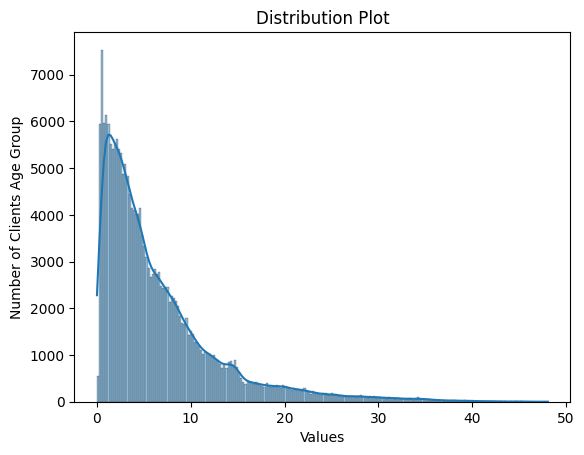

In [17]:
import seaborn as sns


# Plotting
fig, ax = plt.subplots()
sns.histplot(days_unemployed, kde=True, ax=ax)

# Customize plot
ax.set_xlabel('Values')
ax.set_ylabel('Number of Clients Age Group')
ax.set_title('Distribution Plot')

# Display plot using streamlit
plt.show(fig)

In [27]:
data

,DAYS_EMPLOYED,TARGET
0,1.745205,1
1,3.254795,0
2,0.616438,0
3,8.326027,0
4,8.323288,0
...,...,...
246000,13.405479,0
246003,1.331507,0
246005,0.232877,0
246006,1.635616,0


428
214.0


KeyError: 'DAYS_BIRTH'

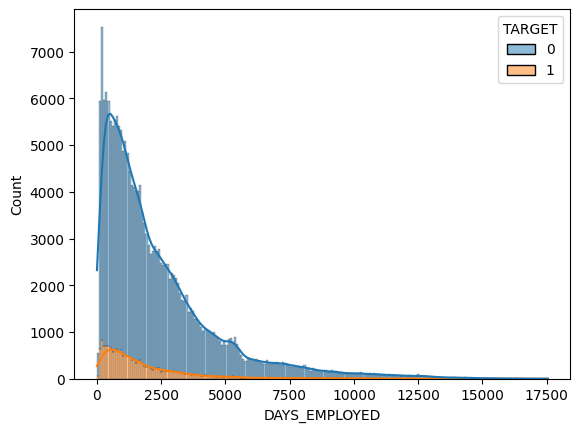

In [29]:

data = pd.concat([xdays_unemployed, ydays_unemployed], axis=1)
category = 'DAYS_EMPLOYED'


    
plot_histogram(data, category)

In [55]:
print(len(bin_counts)/2)
print(min(data['DAYS_BIRTH']), " ", max(data['DAYS_BIRTH']))
print("selected point: ", data.loc[highlighted_index, 'DAYS_BIRTH'])
scaled_point = int(round(data.loc[highlighted_index, 'DAYS_BIRTH']-min(data['DAYS_BIRTH'])))
print("scaled point: ", scaled_point)

print("steps :", (max(data['DAYS_BIRTH'])-min(data['DAYS_BIRTH']))/(len(bin_counts)/2))
hight = bin_counts[scaled_point]
print("hight :", hight)

77.0
20.517808219178082   69.04383561643836
selected point:  52.18082191780822
scaled point:  32
steps : 0.6302081480163673
hight : 337.0


/var/folders/vk/1tfz04l501xdcyxn99z965pw0000gn/T/ipykernel_43144/769176982.py:25: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = legend.legendHandles


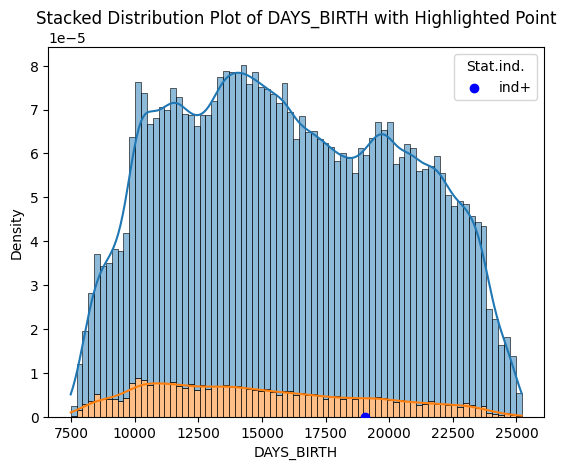

In [24]:
# Merge X_train and Y_train into a single DataFrame
data = pd.concat([X_train, Y_train], axis=1)

# Highlighted data point
highlighted_index = 2  # Index of the data point to highlight
highlighted_value = data.loc[highlighted_index, 'DAYS_BIRTH']

# Plotting
fig, ax = plt.subplots()
sns.histplot(data=data, x='DAYS_BIRTH', hue='TARGET', kde=True, stat='density', multiple='stack', ax=ax)

# Highlight one specific data point
if Y_train.loc[highlighted_index, 'TARGET'] == 1:
    ax.scatter(highlighted_value, 0, color='red', label='Highlighted Point', zorder=5)
elif Y_train.loc[highlighted_index, 'TARGET'] == 0:
    ax.scatter(highlighted_value, 0, color='blue', label='Highlighted Point', zorder=5)

# Customize plot
ax.set_xlabel('DAYS_BIRTH')
ax.set_ylabel('Density')
ax.set_title('Stacked Distribution Plot of DAYS_BIRTH with Highlighted Point')
ax.legend(title='TARGET')

legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['ind+', 'dep+'], title='Stat.ind.')
# Display plot using Streamlit
#st.pyplot(fig)
plt.show(fig)

/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


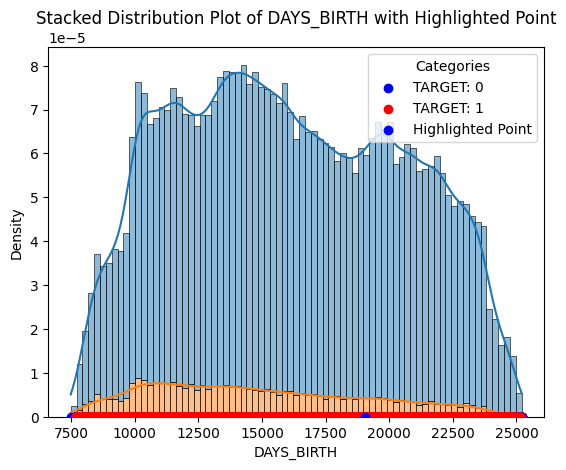

In [23]:
# Merge X_train and Y_train into a single DataFrame
data = pd.concat([X_train, Y_train], axis=1)

# Highlighted data point
highlighted_index = 2  # Index of the data point to highlight
highlighted_value = data.loc[highlighted_index, 'DAYS_BIRTH']

# Plotting
fig, ax = plt.subplots()
sns.histplot(data=data, x='DAYS_BIRTH', hue='TARGET', kde=True, stat='density', multiple='stack', ax=ax)

# Scatter plot for each category
for target_value, color in zip([0, 1], ['blue', 'red']):
    target_data = data[data['TARGET'] == target_value]
    ax.scatter(target_data['DAYS_BIRTH'], np.zeros_like(target_data['DAYS_BIRTH']), color=color, label=f'TARGET: {target_value}', zorder=5)

# Highlight the specific data point
highlighted_target = Y_train.loc[highlighted_index, 'TARGET']
highlighted_color = 'red' if highlighted_target == 1 else 'blue'
ax.scatter(highlighted_value, 0, color=highlighted_color, label='Highlighted Point', zorder=5)

# Customize plot
ax.set_xlabel('DAYS_BIRTH')
ax.set_ylabel('Density')
ax.set_title('Stacked Distribution Plot of DAYS_BIRTH with Highlighted Point')

# Display legend
ax.legend(title='Categories')

# Display plot
plt.show(fig)

In [9]:
#pip install chart_studio

In [11]:
import plotly.plotly as py
import plotly.graph_objs as go

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [8]:

import plotly.plotly as py
import plotly.graph_objs as go

base_chart = {
    "values": [40, 10, 10, 10, 10, 10, 10],
    "labels": ["-", "0", "20", "40", "60", "80", "100"],
    "domain": {"x": [0, .48]},
    "marker": {
        "colors": [
            'rgb(255, 255, 255)',
            'rgb(255, 255, 255)',
            'rgb(255, 255, 255)',
            'rgb(255, 255, 255)',
            'rgb(255, 255, 255)',
            'rgb(255, 255, 255)',
            'rgb(255, 255, 255)'
        ],
        "line": {
            "width": 1
        }
    },
    "name": "Gauge",
    "hole": .4,
    "type": "pie",
    "direction": "clockwise",
    "rotation": 108,
    "showlegend": False,
    "hoverinfo": "none",
    "textinfo": "label",
    "textposition": "outside"
}

meter_chart = {
    "values": [50, 10, 10, 10, 10, 10],
    "labels": ["Log Level", "Debug", "Info", "Warn", "Error", "Fatal"],
    "marker": {
        'colors': [
            'rgb(255, 255, 255)',
            'rgb(232,226,202)',
            'rgb(226,210,172)',
            'rgb(223,189,139)',
            'rgb(223,162,103)',
            'rgb(226,126,64)'
        ]
    },
    "domain": {"x": [0, 0.48]},
    "name": "Gauge",
    "hole": .3,
    "type": "pie",
    "direction": "clockwise",
    "rotation": 90,
    "showlegend": False,
    "textinfo": "label",
    "textposition": "inside",
    "hoverinfo": "none"
}

layout = {
    'xaxis': {
        'showticklabels': False,
        'showgrid': False,
        'zeroline': False,
    },
    'yaxis': {
        'showticklabels': False,
        'showgrid': False,
        'zeroline': False,
    },
    'shapes': [
        {
            'type': 'path',
            'path': 'M 0.235 0.5 L 0.24 0.65 L 0.245 0.5 Z',
            'fillcolor': 'rgba(44, 160, 101, 0.5)',
            'line': {
                'width': 0.5
            },
            'xref': 'paper',
            'yref': 'paper'
        }
    ],
    'annotations': [
        {
            'xref': 'paper',
            'yref': 'paper',
            'x': 0.23,
            'y': 0.45,
            'text': '50',
            'showarrow': False
        }
    ]
}

# we don't want the boundary now
base_chart['marker']['line']['width'] = 0

fig = {"data": [base_chart, meter_chart],
       "layout": layout}
py.iplot(fig, filename='gauge-meter-chart')

KeyboardInterrupt: 

In [14]:
import plotly.graph_objects as go

# Define the gauge chart layout
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = 70,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Speed"},
    gauge = {
        'axis': {'range': [None, 100]},
        'steps' : [
            {'range': [0, 20], 'color': "lightgray"},
            {'range': [20, 40], 'color': "gray"},
            {'range': [40, 60], 'color': "lightgray"},
            {'range': [60, 80], 'color': "gray"},
            {'range': [80, 100], 'color': "lightgray"}],
        'threshold' : {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 90}
    }
))

# Show the plot
fig.show()

In [16]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = 270,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Speed"}))

fig.show()